# 미션 3주차 
* 결과와 함께 마지막에는 분석도 나름 해보았습니다..

In [215]:
# 미션 풀이를 위한 준비

import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

df.shape

(1000000, 34)

In [176]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [222]:
# 데이터 미리 보기
df.head(1)

,기준년도,가입자일련번호,성별코드,연령대,시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126


In [177]:
# 데이터 요약 정보 확인
df.describe()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999738.000000,999732.000000,999560.000000,999712.000000,999721.000000,...,999955.000000,999840.000000,999475.000000,1000000.000000,0.0,0.0,0.0,0.0,398748.000000,1000000.0
mean,2017.0,500000.500000,1.468828,10.539593,33.733031,162.217421,63.409614,81.370788,0.978897,0.976267,...,37.233369,1.606411,0.497007,0.398748,NaN,NaN,NaN,NaN,0.602157,20181126.0
std,0.0,288675.278933,0.499028,2.860117,12.654664,9.399948,12.879205,12.205698,0.610948,0.605323,...,50.605298,0.817844,0.499991,0.489641,NaN,NaN,NaN,NaN,0.590314,0.0
min,2017.0,1.000000,1.000000,5.000000,11.000000,85.000000,20.000000,0.000000,0.100000,0.100000,...,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
25%,2017.0,250000.750000,1.000000,8.000000,27.000000,155.000000,55.000000,74.200000,0.700000,0.700000,...,16.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
50%,2017.0,500000.500000,1.000000,11.000000,41.000000,160.000000,60.000000,81.000000,1.000000,1.000000,...,23.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
75%,2017.0,750000.250000,2.000000,13.000000,44.000000,170.000000,70.000000,88.000000,1.200000,1.200000,...,40.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
max,2017.0,1000000.000000,2.000000,18.000000,50.000000,200.000000,180.000000,999.000000,9.900000,9.900000,...,999.000000,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,20181126.0


In [178]:
# 데이터 컬럼 확인
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [179]:
# 데이터 결측치 확인하기
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

## 1번 문제 : 연령대별 허리둘레에 대한 기술통계를 구하기
* 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!


In [180]:
# 제공된 딕셔너리

age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

age_code

{1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [181]:
# pivot_table 로 연령대코드 기준으로 그룹화한 후, 허리둘레의 설명 출력

df_age_waist = pd.pivot_table(data=df, index='연령대코드(5세단위)',values='허리둘레',aggfunc='describe')
df_age_waist


,25%,50%,75%,count,max,mean,min,std
연령대코드(5세단위),,,,,,,,
5,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
6,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
7,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
8,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
9,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
10,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
11,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
12,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
13,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176


In [182]:
# 딕셔너리 이용해 연령대코드에 맞는 연령대만을 리스트로 생성
age = [age_code[i] for i in df_age_waist.index]
age

['20~24세',
 '25~29세',
 '30~34세',
 '35~39세',
 '40~44세',
 '45~49세',
 '50~54세',
 '55~59세',
 '60~64세',
 '65~69세',
 '70~74세',
 '75~79세',
 '80~84세',
 '85세+']

In [183]:
# 기존 데이터 프레임의 index 값과 이름 변경
df_age_waist.index = age
df_age_waist.index.name = '연령대'

df_age_waist

,25%,50%,75%,count,max,mean,min,std
연령대,,,,,,,,
20~24세,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
25~29세,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
30~34세,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
35~39세,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
40~44세,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
45~49세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
50~54세,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
55~59세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
60~64세,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176


* 허리둘레의 평균을 보면 연령대가 높아질수록 점차 수치도 같이 올라가는 것 확인 가능
* 다만, 75~79세를 정점으로, 그 후에는 다시 수치가 내려감 -> 이는 나이가 들면서 점차 운동량이 줄어들고, 식사도 제대로 못하거나
* 병에 걸린 노인들이 많아져 그 여파로 허리둘레가 줄은 것은 아닌지 예측해볼 수 있음
* 대체로 평균이 중앙값보다 높기는 하지만, 그렇게 극심한 차이는 없다고 판단

## 2번 문제 : "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요
* 다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.

In [184]:
# df 데이터의 컬럼 확인
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [185]:
# columns 변수 안에 상관계수 계산에 사용할 컬럼들 담기
# "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드" 컬럼만 담기
# 위 
columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
columns

['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']

In [186]:
# 상관계수 계산을 위한 df_corr 변수 만들기

df_small = df[columns]
df_corr = df_small.corr()

df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


* annot=True : 숫자 나타내기 / fmt : 소수점 개수 지정 / cmap : 색상 지정

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11872\1998691075.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr,dtype=np.bool))


<AxesSubplot:>

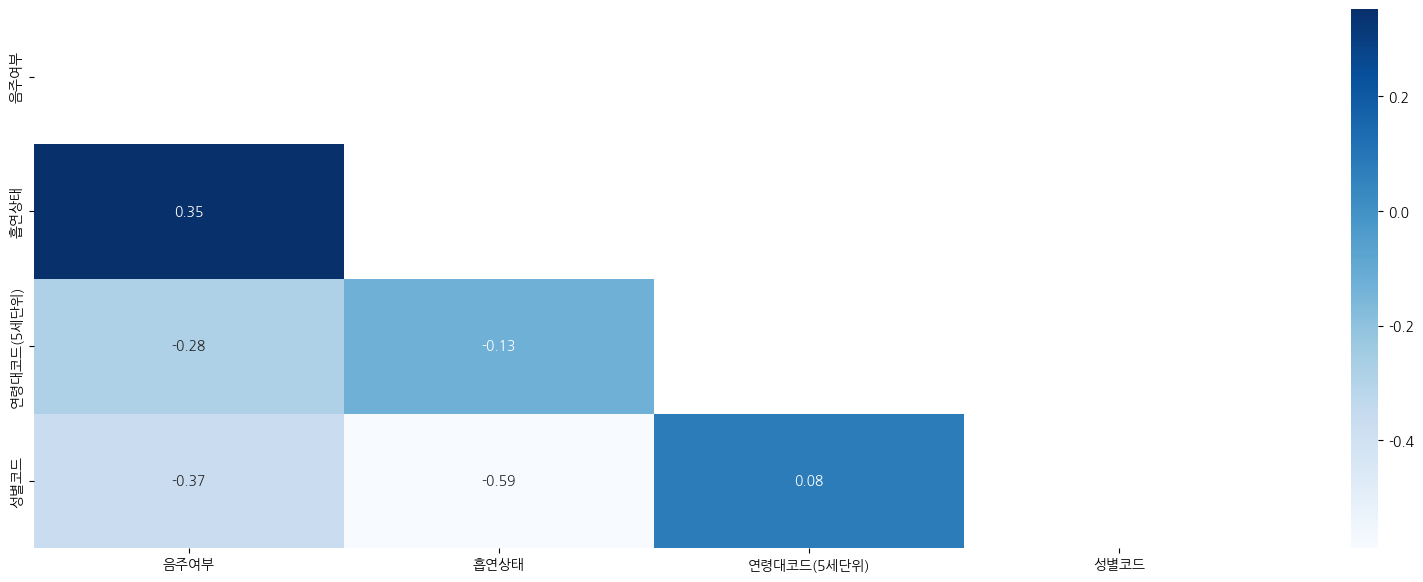

In [191]:
# 그림 사이즈 조절을 위해 matplotlib import
import matplotlib.pyplot as plt

# 매트릭스의 대각선 아래만 나오게 heatmap 그리기
mask = np.triu(np.ones_like(df_corr,dtype=np.bool))

plt.figure(figsize=(20,7))  # heatmap 사이즈 조절
sns.heatmap(df_corr, annot=True,fmt='.2f',cmap='Blues',mask=mask)

* 흡연상태와 음주여부는 양의 상관관계가 있음 -> 주변에서 담배를 피는 사람들이 술을 좋아하기도 하는 모습을 종종 볼 수 있는데 
* 어쩌면 이 데이터 결과가 주변의 일상에서의 패턴을 설명해주는 듯함
* 또한 예전에 술을 마셨을 때, 니코틴= 담배를 피고 싶어한다는 기사를 읽은 적이 있음 
* 그 기사와도 연관이 되는 듯

## 3번 문제 : 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?
* 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

* groupby, pivot_table로 구할 수도 있지만, 수업에서는 다루지 않았던 pandas의 crosstab 기능을 사용해서도 비교적 쉽게 구할 수 있습니다.

* crosstab 을 사용할 때는 다음의 문서를 참고하여 구해보세요. pandas.crosstab — pandas documentation

* 그리고 막대그래프를 통해 결과를 시각화해주세요! 시각화를 할 때 그래프의 스타일이나 막대의 색상 등이 달라도 상관 없으니 사용하고 싶은 스타일을 적용해서 시각화해도 좋습니다.

In [216]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# df["흡연"]
# df["음주"]

In [217]:
# 딕셔너리 이용해 숫자 데이터를 문자로 바꾸기

df['흡연상태'].replace(smoke, inplace=True)
df['음주여부'].replace(drink, inplace=True)

# 잘 변경되었는지 확인
print(df['흡연상태'])
df['음주여부']

0          흡연중
1         흡연안함
2         흡연안함
3         흡연안함
4          흡연중
          ... 
999995    흡연안함
999996    흡연안함
999997    흡연안함
999998      끊음
999999    흡연안함
Name: 흡연상태, Length: 1000000, dtype: object


0         안마심
1         안마심
2         안마심
3          마심
4         안마심
         ... 
999995     마심
999996    안마심
999997    안마심
999998     마심
999999    안마심
Name: 음주여부, Length: 1000000, dtype: object

In [207]:
# 컬럼명 바꾸기
df.rename(columns={'음주여부':'음주'},inplace=True)
df.rename(columns={'흡연상태':'흡연'},inplace=True)

# 잘 변경되었는지 확인
print(df['음주'])
df['흡연']

흡연
0         안마심
1         안마심
2         안마심
3          마심
4         안마심
         ... 
999995     마심
999996    안마심
999997    안마심
999998     마심
999999    안마심
Name: 음주, Length: 1000000, dtype: object


흡연
0          흡연중
1         흡연안함
2         흡연안함
3         흡연안함
4          흡연중
          ... 
999995    흡연안함
999996    흡연안함
999997    흡연안함
999998      끊음
999999    흡연안함
Name: 흡연, Length: 1000000, dtype: object

In [208]:
# pandas의 crosstab 사용해 음주와 흡연에 대한 교차 테이블 생성

table = pd.crosstab(df['음주'],df['흡연'])
table

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<AxesSubplot:xlabel='흡연', ylabel='count'>

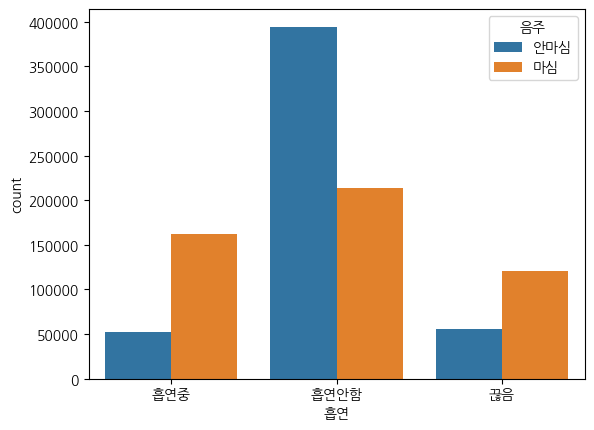

In [209]:
# 막대그래프 통해 시각화

sns.countplot(data=df,x='흡연',hue='음주')

* 흡연중인 사람은 흡연과 음주 모두 하는 경향이 있음을 확인
* 담배를 끊은 사람도 안마시는 인원보다 마시는 인원이 많음 -> 담배와 술 모두를 안하기는 쉽지 않은 듯함
* 흡연을 안하는 사람들은 오히려 음주도 안하는 비율이 높음 -> 건강을 생각하는 사람들인 듯. 바른생활 어른이로 예측 가능

## 4번 문제 : 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!
* 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

In [218]:
# 체중 > 120 kg 만족하는 데이터 추출 
# 체중 관련된 컬럼명 : 체중(5Kg 단위)

df_weight_120 = df[df['체중(5Kg 단위)']>120]

# 잘 추출되었는지 확인
df_weight_120['체중(5Kg 단위)'].unique()

array([155., 140., 130., 125., 165., 145., 135., 150., 170., 180., 160.,
       175.])

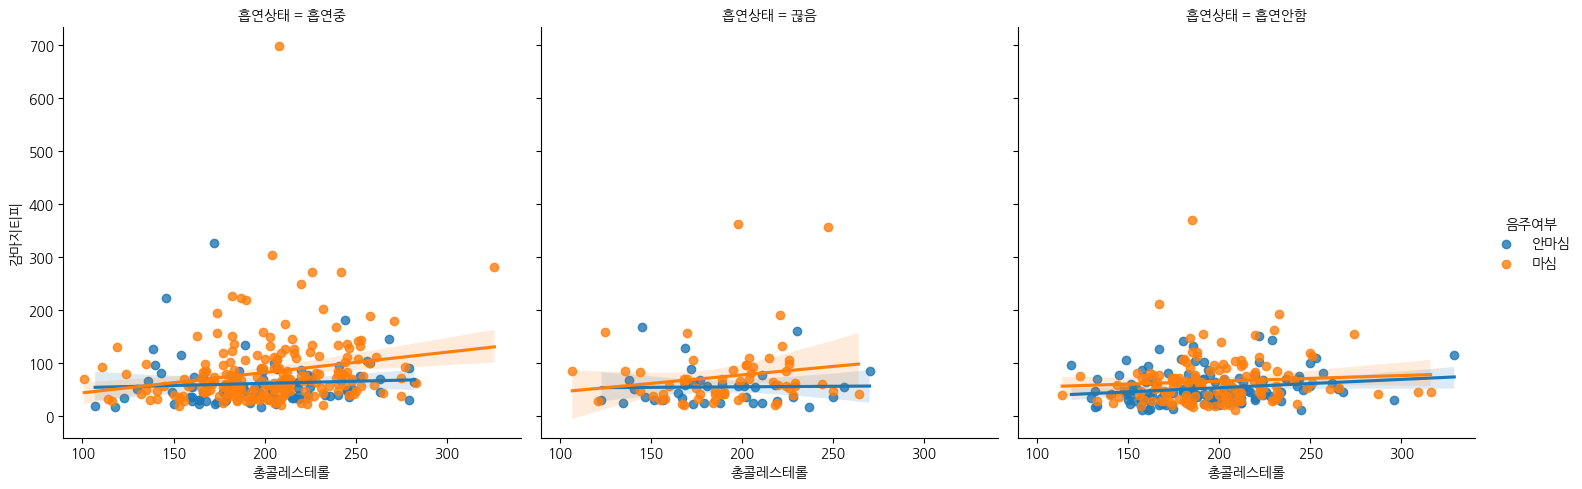

In [263]:
# "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화
# 회귀선까지 그리기 위해 lmplot 으로 시각화

# 3번 문제에서 흡연과 음주에 관한 숫자들을 문자들로 변경

sns.lmplot(data=df_weight_120, x='총콜레스테롤',y='감마지티피',hue='음주여부',col='흡연상태')

* 이상치가 있음을 확인 가능 

## 5번 문제 : 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!
* 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

* 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

* 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

* 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

In [220]:
# 시력에 관련된 컬럼 확인
# '시력(좌)', '시력(우)'
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [233]:
# '연령대코드(5세단위)' 컬럼명 '연령대'로 바꾸기
df.rename(columns={'연령대코드(5세단위)':'연령대'},inplace=True)

# 1번 문제의 딕셔너리 이용해 연령대 숫자를 문자로 변경
df['연령대'].replace(age_code, inplace=True)

# 잘 바뀌었는지 확인
df['연령대'].unique()

array(['60~64세', '35~39세', '55~59세', '25~29세', '80~84세', '45~49세',
       '40~44세', '70~74세', '20~24세', '50~54세', '30~34세', '65~69세',
       '75~79세', '85세+'], dtype=object)

<AxesSubplot:>

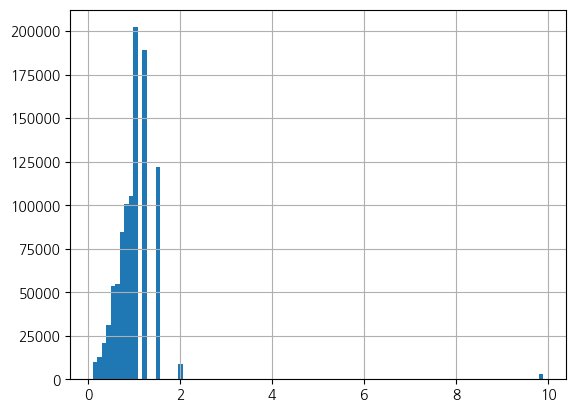

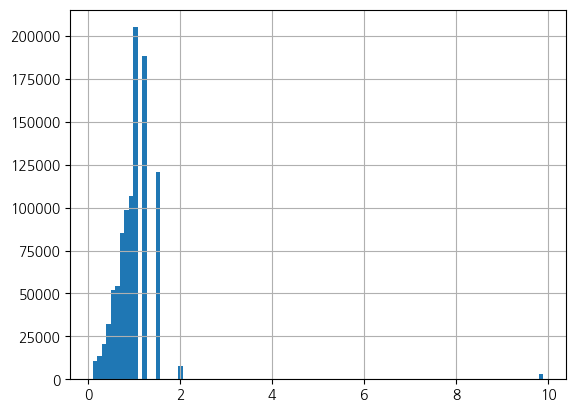

In [247]:
# 실명 데이터 제거를 위해 시력 데이터 본포를 히스토그램으로 확인

plt.figure(1)
df['시력(좌)'].hist(bins=100)

plt.figure(2)
df['시력(우)'].hist(bins=100)



* 위 히스토그램을 보면 9.9 에 실명 데이터 있음을 확인 가능
* 9.9 실명 데이터를 제거해줘야 함

In [261]:
# 실명 데이터 제거 위해 인덱스를 리스트 형태로 변수에 저장
df_drop_index = df[df['시력(좌)']== 9.9].index.tolist()
df_drop_index1 = df[df['시력(우)']== 9.9].index.tolist()

# 위에서 실명 데이터 인덱스들 합쳐줌
df_drop_index = df_drop_index + df_drop_index1
df_drop_index

# 제거 전 데이터 확인
print(df.shape)

# 인덱스 변수 활용해 데이터 제거
df_drop = df.drop(df_drop_index )

# 제거 후 데이터 확인
df_drop.shape

(1000000, 34)


(994187, 34)

<AxesSubplot:xlabel='연령대', ylabel='시력(우)'>

<Figure size 640x480 with 0 Axes>

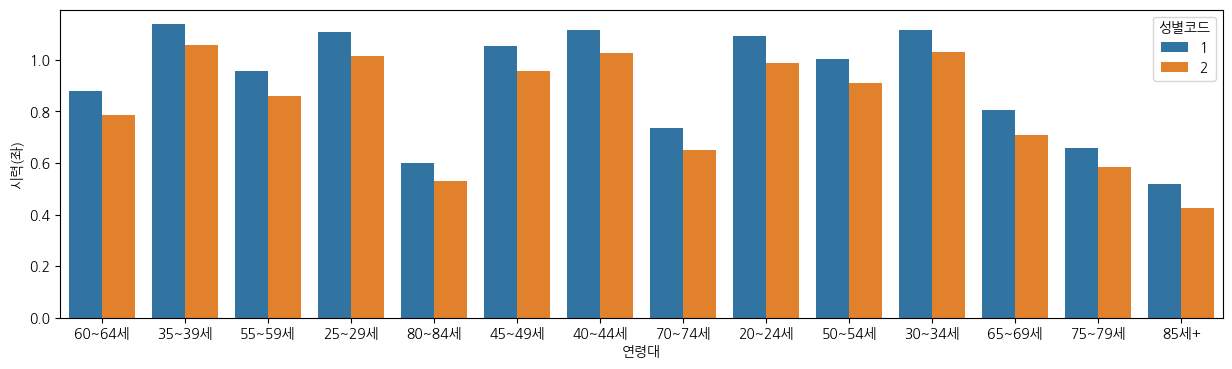

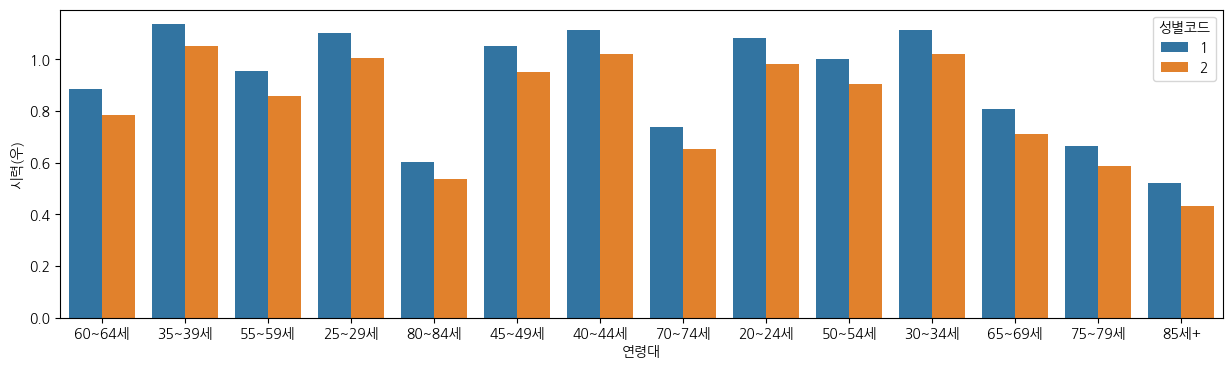

In [262]:
# 연령대 에 따른 시력(좌) 을 성별코드에 따라 barplot으로 그림
plt.figure(1)
plt.figure(figsize=(15,4))
sns.barplot(data =df_drop,x='연령대',y='시력(좌)',hue = '성별코드',ci=None)

plt.figure(2)
plt.figure(figsize=(15,4))
sns.barplot(data =df_drop,x='연령대',y='시력(우)',hue = '성별코드',ci=None)

*  결과 : 남성이 여성보다 대체로 시력이 높은 것을 확인할 수 있음